# Healthcare Diabetes Dataset

ชุดข้อมูลนี้เกี่ยวกับปัจจัยสุขภาพของผู้ป่วยโรคเบาหวาน ที่จะนำมาใช้ในการวิเคราะห์ปัจจัยที่มีผลต่อการเกิดโรคเบาหวาน

ในแต่ละ row คือกลุ่มตัวอย่างผู้ที่เป็นและไม่เป็นโรคเบาหวาน  1 row 1 คน และมีคอลัมน์ดังนี้:

* Id ระบุข้อมูลแต่ละในแต่row

* Pregnancies ประวัติการตั้งครรภ์(จำนวนครั้งที่ตั้งครรภ์)

* Glucose ระดับน้ำตาลในเลือด
ภายหลังการดื่มน้ำเชื่อมกลูโคสประมาณ 2 ชั่วโมง
เพื่อวัดความสามารถในการจัดการน้ำตาลในเลือด(Oral Glucose Tolerance Test - OGTT) หน่วย: มิลลิกรัมต่อเดซิลิตร(mg/dL)

* BloodPressure ความดันโลหิตขณะหัวใจคลายตัว (Diastolic)
หน่วย: มิลลิเมตรปรอท(mm Hg)

* SkinThickness ความหนาของชั้นไขมันใต้ผิวหนังบริเวณต้นแขน (Triceps) หน่วย: มิลลิเมตร(mm)

* Insulin ระดับอินซูลินในเลือดที่วัดภายหลังการดื่มน้ำเชื่อมกลูโคสประมาณ 2 ชั่วโมง(ในการทดสอบ OGTT)
หน่วย: ไมโครยูนิตต่อมิลลิลิตร(mu U/ml) ค่าสูงขึ้นบ่งชี้ถึงภาวะดื้ออินซูลินที่รุนแรงขึ้นเรื่อยๆ


* BMI ดัชนีมวลกาย (น้ำหนักเป็น กก. / ส่วนสูงเป็น ม.^2)

* DiabetesPedigreeFunction: ฟังก์ชันลำดับเครือญาติโรคเบาหวาน สะท้อนความเสี่ยงทางพันธุกรรม ซึ่งเป็นคะแนนทางพันธุกรรมของโรคเบาหวาน

* Age อายุ (ปี)

* Outcome(Diabetes) การจำแนกประเภทของกลุ่มตัวอย่าง โดยที่1คือผู้ที่เป็นโรคเบาหวาน และ0 คือผู้ที่ไม่เป็นโรคเบาหวาน

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("/content/Healthcare-Diabetes-Dataset.csv",index_col='Id')

In [ ]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                      
1             6      148             72             35        0 33.60   
2             1       85             66             29        0 26.60   
3             8      183             64              0        0 23.30   
4             1       89             66             23       94 28.10   
5             0      137             79             35      168 43.10   

    DiabetesPedigreeFunction  Age  Outcome  
Id                                          
1                       0.63   50        1  
2                       0.35   31        0  
3                       0.67   32        1  
4                       0.17   21        0  
5                       2.29   33        1

In [ ]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                        
2764            2       75             64             24       55 29.70   
2765            8      179             72             42      130 32.70   
2766            6       85             78              0        0 31.20   
2767            0      129            104             46      130 53.00   
2768            2       81             72             15       76 30.10   

      DiabetesPedigreeFunction  Age  Outcome  
Id                                            
2764                      0.37   33        0  
2765                      0.72   36        1  
2766                      0.38   42        0  
2767                      0.32   26        1  
2768                      0.55   25        0

# EDA and Data pre-processing

In [ ]:
# สำรวจข้อมูลเบื้องต้น -- มีข้อมูลทั้งหมด 2768 แถว × 9 คอลัมน์
df.shape

(2768, 9)

In [ ]:
# เปลี่ยนชื่อคอลัมน์Outcome เป็น Diabetes เพื่อให้สื่อถึงโรคเบาหวาน 0=no diabetes และ 1=diabetes
df = df.rename(columns={'Outcome': 'Diabetes'})
display(df.head())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                      
1             6      148             72             35        0 33.60   
2             1       85             66             29        0 26.60   
3             8      183             64              0        0 23.30   
4             1       89             66             23       94 28.10   
5             0      137             79             35      168 43.10   

    DiabetesPedigreeFunction  Age  Diabetes  
Id                                           
1                       0.63   50         1  
2                       0.35   31         0  
3                       0.67   32         1  
4                       0.17   21         0  
5                       2.29   33         1

In [ ]:
# ตรวจสอบ Data Type และ Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 1 to 2768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Diabetes                  2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB


พบว่าแต่ละคอลัมน์เก็บข้อมูลประเภท int และ float
จึงมี data type เหมาะสมแล้ว

In [ ]:
# ตรวจสอบค่าnull -- พบว่าไม่พบค่าnull
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [ ]:
# เช็คข้อมูลซ้ำ -- พบว่ามีข้อมูลซ้ำ 1,990 แถว
df.duplicated().sum()

np.int64(1990)

## Cleansing data 1. ลบข้อมูลแถวที่มีค่าซ้ำกัน

In [ ]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Get the number of remaining rows
remaining_rows = len(df)
print(f"จำนวนแถวที่เหลือหลังจากลบข้อมูลซ้ำ: {remaining_rows} แถว")

จำนวนแถวที่เหลือหลังจากลบข้อมูลซ้ำ: 778 แถว


In [ ]:
df.duplicated().sum()

np.int64(0)

ตอนนี้dataframe แต่ละคอลัมน์มีdata typeเหมาะสมแล้ว
และไม่มีค่าNull ไม่มีค่าข้อมูลซ้ำ มีข้อมูลทั้งหมด 778 แถว × 9 คอลัมน์

In [ ]:
# ดูค่าสถิติเบื้องต้น
df.describe().round(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       778.00   778.00         778.00         778.00   778.00 778.00   
mean          3.82   121.23          69.53          20.69    79.42  32.10   
std           3.36    31.94          19.03          16.05   110.29   7.93   
min           0.00     0.00           0.00           0.00     0.00   0.00   
25%           1.00    99.00          64.00           0.00     0.00  27.32   
50%           3.00   117.00          72.00          23.00    36.00  32.25   
75%           6.00   141.00          80.00          32.00   130.00  36.78   
max          17.00   199.00         122.00          99.00   600.00  64.40   

       DiabetesPedigreeFunction    Age  Diabetes  
count                    778.00 778.00    778.00  
mean                       0.47  33.33      0.35  
std                        0.33  11.72      0.48  
min                        0.08  21.00      0.00  
25%                        0.24  24.00      0.00  
50%                        0.37  29.00      0.00  
75%                        0.63  41.00      1.00  
max                        2.42  72.00      1.00

In [ ]:
# นับจำนวนแถวที่มีค่าเป็น 0 ในแต่ละคอลัมน์
check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

for col in check:
    num_zeros = (df[col] == 0).sum()
    print(f"จำนวนแถวที่คอลัมน์ {col} มีค่าเป็น 0 คือ: {num_zeros} แถว")

จำนวนแถวที่คอลัมน์ Pregnancies มีค่าเป็น 0 คือ: 114 แถว
จำนวนแถวที่คอลัมน์ Glucose มีค่าเป็น 0 คือ: 5 แถว
จำนวนแถวที่คอลัมน์ BloodPressure มีค่าเป็น 0 คือ: 36 แถว
จำนวนแถวที่คอลัมน์ SkinThickness มีค่าเป็น 0 คือ: 229 แถว
จำนวนแถวที่คอลัมน์ Insulin มีค่าเป็น 0 คือ: 377 แถว
จำนวนแถวที่คอลัมน์ BMI มีค่าเป็น 0 คือ: 11 แถว


พบว่า มีคอลัมน์Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI	มีค่าต่ำสุด คือ 0

* คอลัมน์Pregnancies มีข้อมูลต่ำสุด คือ 0 (ไม่เคยตั้งครรภ์)
และสูงสุด คือ 17 ซึ่งมีโอกาสเป็นไปได้จริง ในกลุ่มประชากรชาวอินเดียนแดงเผ่าPima ในรัฐแอริโซนา สหรัฐอเมริกา  แม้ว่าตัวเลขจะไม่สอดคล้องกับสภาพสังคมในปัจจุบัน แต่การตั้งครรภ์เป็นปัจจัยหนึ่งที่เพิ่มความเสี่ยงในการเป็นโรคเบาหวานในอนาคต


* คอลัมน์Glucose,BloodPressure,SkinThickness,Insulin,BMI มีค่าต่ำสุดเป็น 0
ซึ่งข้อมูลเหล่านี้ไม่ควรมีค่าเป็น 0

  จากการค้นคว้าข้อมูลเพิ่มเติมพบว่า ระดับอินซูลินInsulinในเลือดสามารถมีค่า0ได้ เกิดขึ้นในผู้ป่วยโรคเบาหวานชนิดที่1 คือ ภาวะที่ร่างกายไม่สามารถผลิตอินซูลินได้เลยหรือผลิตได้น้อยมากเพราะตับอ่อนถูกทำลาย เมื่อไม่มีอินซูลิน ร่างกายก็ไม่สามารถนำน้ำตาล(กลูโคส)ในเลือดไปใช้เป็นพลังงานได้ ทำให้น้ำตาลค้างอยู่ในกระแสเลือดในปริมาณสูงมาก  
  
  เนื่องจากข้อมูลแถวที่คอลัมน์Insulinมีค่าเป็น 0 มีจำนวนมาก 377 แถว(48%ของข้อมูลทั้งหมด) ซึ่งมีผลต่อการคำนวณค่าสถิติและการสร้างโมเดล
  หากแก้ไขด้วยการแทนค่าข้อมูล อาจทำให้ผลลัพธ์บิดเบือนไป จึงจะทำการลบข้อมูลแถวที่คอลัมน์Insulinมีค่าเป็น 0 ออก จำนวน 377 แถว เพื่อยังคงข้อมูลเดิมไว้ได้มากที่สุด

## Cleansing data 2. ลบข้อมูลคอลัมน์ Insulin ที่มีค่าเป็น 0

In [ ]:
# ลบข้อมูลแถวที่คอลัมน์ Insulin มีค่าเป็น 0
df = df[df['Insulin'] != 0]
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                      
4             1       89             66             23       94 28.10   
5             0      137             79             35      168 43.10   
7             3       78             50             32       88 31.00   
9             2      197             70             45      543 30.50   
14            1      189             60             23      600 30.10   

    DiabetesPedigreeFunction  Age  Diabetes  
Id                                           
4                       0.17   21         0  
5                       2.29   33         1  
7                       0.25   26         1  
9                       0.16   53         1  
14                      0.40   59         1

In [ ]:
# เหลือข้อมูล 401 แถว × 9 คอลัมน์
df.shape

(401, 9)

In [ ]:
# เช็คคอลัมน์Glucose,BloodPressure,SkinThickness,BMI ที่มีค่าเป็น 0
zero_glucose = df[df['Glucose'] == 0]
display(zero_glucose)

zero_BloodPressure = df[df['BloodPressure'] == 0]
display(zero_BloodPressure)

zero_SkinThickness = df[df['SkinThickness'] == 0]
display(zero_SkinThickness)

zero_BMI = df[df['BMI'] == 0]
display(zero_BMI)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                       
183            1        0             74             20       23 27.70   

     DiabetesPedigreeFunction  Age  Diabetes  
Id                                            
183                      0.30   21         0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                        
2337            3      162              0             50      215 48.70   

      DiabetesPedigreeFunction  Age  Diabetes  
Id                                             
2337                      0.52   24         0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                        
2332            4      183             66              0      215 46.50   

      DiabetesPedigreeFunction  Age  Diabetes  
Id                                             
2332                      0.65   40         0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Id                                                                      
372            0      118             64             23       89 0.00   

     DiabetesPedigreeFunction  Age  Diabetes  
Id                                            
372                      1.73   21         0

พบคอลัมน์Glucose,BloodPressure,SkinThickness,BMI ที่มีค่าเป็น 0 จะทำการแก้ไขด้วยการแทนค่าด้วยค่ามัธยฐานโดยแยกตามกลุ่มDiabetes(0 หรือ 1)

## Cleansing data 3. คอลัมน์Glucose,BloodPressure,SkinThickness,BMI ที่มีค่าเป็น 0  แทนค่าด้วยค่ามัธยฐานโดยแยกตามกลุ่มDiabetes(0 หรือ 1)

In [ ]:
# ระบุคอลัมน์ที่มี 0 หมายถึง "ข้อมูลหายไป"
fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# แทนที่ค่า 0 ด้วย np.nan (NaN) เฉพาะในคอลัมน์เหล่านี้
df[fix] = df[fix].replace(0, np.nan)

# แทนที่ NaN ด้วยค่ามัธยฐาน (Median) โดยแยกตามกลุ่มDiabetes
for col in fix:
    df[col] = df[col].fillna(df.groupby('Diabetes')[col].transform('median'))

# เช็คว่ายังมีค่าNaNหรือไม่ (ควรเป็น 0)
print("จำนวนค่าว่างที่เหลืออยู่:")
print(df[fix].isnull().sum())

จำนวนค่าว่างที่เหลืออยู่:
Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
dtype: int64


In [ ]:
# ดูค่าสถิติหลังcleanข้อมูลแล้ว (ไม่มีค่าminเป็น0แล้ว)
df.describe().round(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       401.00   401.00         401.00         401.00   401.00 401.00   
mean          3.26   123.16          71.62          29.29   154.09  33.13   
std           3.20    30.80          11.00          10.63   109.97   6.91   
min           0.00    70.00          50.00           7.00    14.00  18.20   
25%           1.00    99.00          64.00          21.00    77.00  28.40   
50%           2.00   120.00          72.00          29.00   126.00  33.20   
75%           5.00   144.00          78.00          37.00   191.00  37.40   
max          17.00   198.00         106.00          63.00   600.00  55.00   

       DiabetesPedigreeFunction    Age  Diabetes  
count                    401.00 401.00    401.00  
mean                       0.53  30.94      0.33  
std                        0.35  10.15      0.47  
min                        0.08  21.00      0.00  
25%                        0.28  23.00      0.00  
50%                        0.45  27.00      0.00  
75%                        0.69  36.00      1.00  
max                        2.42  65.00      1.00

In [ ]:
# Export the cleaned DataFrame to a new CSV file
df.to_csv('healthcare_diabetes_cleaned.csv', index=True)

# Explore Data Analysis วิเคราะห์ข้อมูล&visualization

In [ ]:
# ระบุตัวแปร
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target = "Diabetes"

X = df.drop(columns=[target])
y = df[target]

In [ ]:
# สัดส่วนของกลุ่มตัวอย่างที่เป็นโรคเบาหวาน
diabetes = df.groupby('Diabetes')['Diabetes'].count()
diabetes

Diabetes
0    269
1    132
Name: Diabetes, dtype: int64

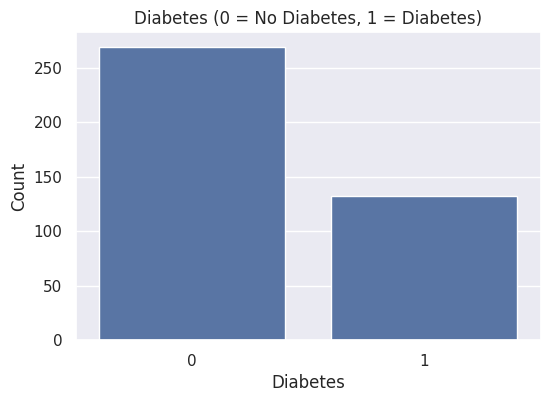


สัดส่วน Diabetes:
Diabetes
0   0.67
1   0.33
Name: proportion, dtype: float64


In [ ]:
sns.set_theme()
plt.figure(figsize=(6, 4))
sns.countplot(x="Diabetes", data=df)
plt.title("Diabetes (0 = No Diabetes, 1 = Diabetes)")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()
print("\nสัดส่วน Diabetes:")
print(df["Diabetes"].value_counts(normalize=True))

กลุ่มตัวอย่างทั้งหมด 401 คน พบว่า

ผู้ที่ไม่เป็นโรคเบาหวาน (Diabetes = 0) มีจำนวน 269 คน คิดเป็น 67% ของข้อมูลทั้งหมด

ผู้ที่เป็นโรคเบาหวาน (Diabetes = 1) มีจำนวน 132 คน คิดเป็น 33% ของข้อมูลทั้งหมด

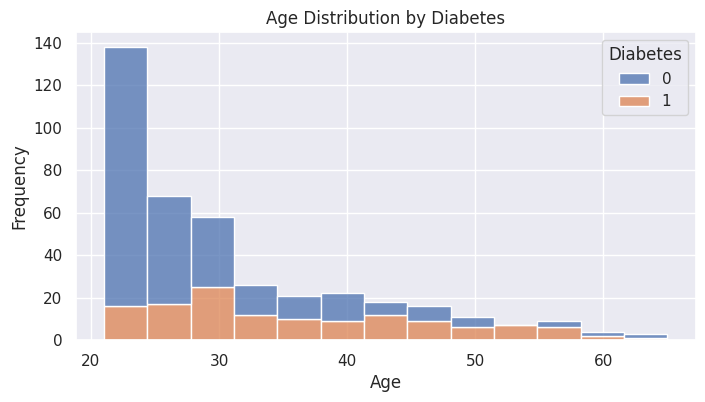

In [ ]:
#กราฟแสดงการกระจายตัวของอายุของผู้ป่วยเบาหวานและไม่เป็นเบาหวาน
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="Age", hue="Diabetes", multiple="stack", kde=False)

plt.title("Age Distribution by Diabetes")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

ข้อมูลจากลุ่มตัวอย่าง
- กลุ่มอายุส่วนใหญ่กระจุกตัวอยู่ในช่วงอายุ 20–35 ปี
- ผู้ที่ไม่เป็นโรคเบาหวาน พบมากในช่วงอายุน้อย 20–30 ปี
- ผู้ที่เป็นโรคเบาหวาน พบมากขึ้นในช่วงอายุ 30–50 ปี และมีสัดส่วนของผู้ที่เป็นโรคเบาหวานเพิ่มขึ้น
- อาจกล่าวได้ว่า อายุเพิ่มขึ้น มีโอกาสเพิ่มความเสี่ยงในการเป็นโรคเบาหวานมากขึ้น

In [ ]:
# ค่ามัธยฐาน(Median)ของแต่ละ feature แยกตาม Diabetes = 0/1
group_median = df.groupby('Diabetes')[features].median().T
group_median.columns = ['No_Diabetes(0)', 'Diabetes(1)']
group_median['Difference(1-0)'] = group_median['Diabetes(1)'] - group_median['No_Diabetes(0)']

display(group_median.sort_values('Difference(1-0)', ascending=False).round(2))

No_Diabetes(0)  Diabetes(1)  Difference(1-0)
Insulin                           105.00       173.00            68.00
Glucose                           108.00       144.00            36.00
Age                                25.00        33.00             8.00
SkinThickness                      27.00        33.00             6.00
BloodPressure                      70.00        74.50             4.50
BMI                                31.60        34.60             3.00
Pregnancies                         2.00         3.00             1.00
DiabetesPedigreeFunction            0.42         0.55             0.14

<Figure size 800x600 with 0 Axes>

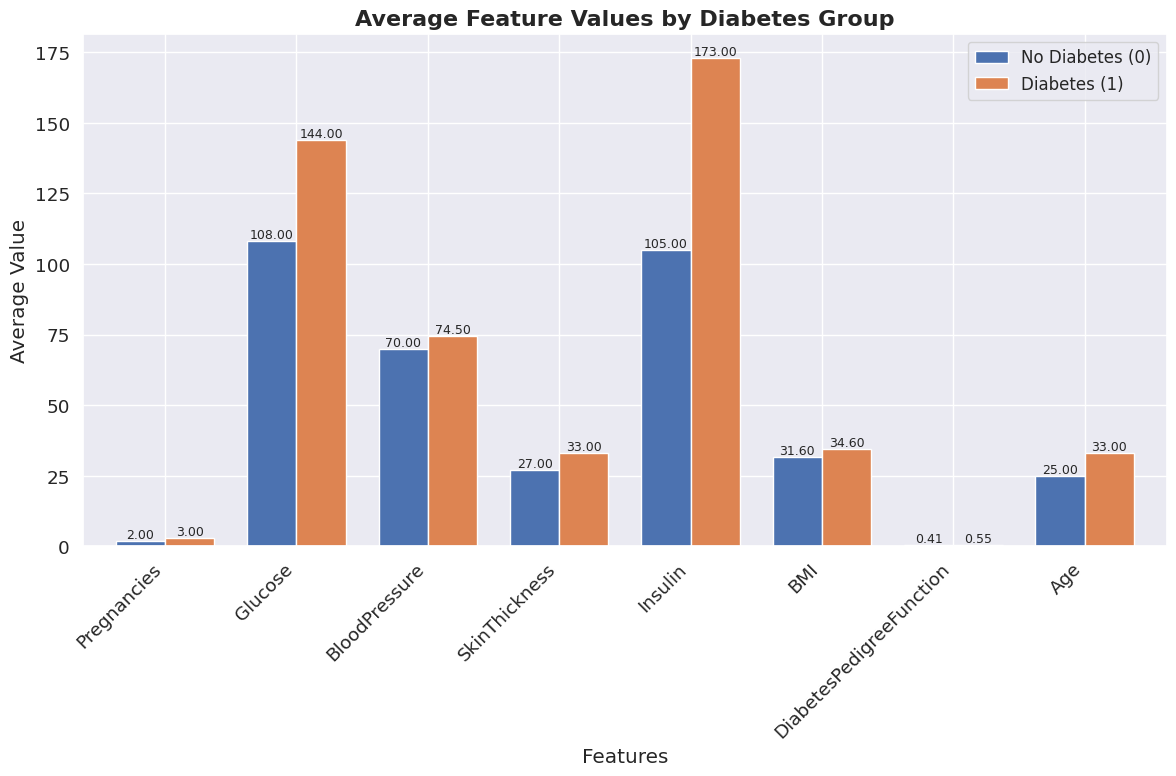

In [ ]:
# กราฟแท่งเปรียบเทียบค่ามัธยฐาน(Median)แต่ละfeature
group_median = df.groupby('Diabetes')[features].median().T
group_median.columns = ['No_Diabetes(0)', 'Diabetes(1)']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

ax = group_median.plot(kind="bar", figsize=(12, 8),
                     color=["#4c72b0", "#dd8452"], width=0.75)

plt.title("Average Feature Values by Diabetes Group", fontsize=16, fontweight="bold")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha="right")
plt.legend(["No Diabetes (0)", "Diabetes (1)"], fontsize=12)

# ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


เปรียบเทียบค่ามัธยฐาน(Median)ของแต่ละ feature โดยแบ่งตามกลุ่มตัวอย่างDiabetes
*   ผู้ที่เป็นโรคเบาหวานมีค่าระดับน้ำตาล(Glucose), อายุ และ ระดับอินซูลิน(Insulin)สูงกว่าอย่างชัดเจน
โดยระดับอินซูลินที่สูงกว่ามาก แสดงถึงภาวะดื้อต่ออินซูลิน


* ผู้ที่เป็นโรคเบาหวานมีค่าความหนาของชั้นไขมันใต้ผิวหนัง(SkinThickness)และดัชนีมวลกาย(BMI) สูงกว่า สะท้อนถึงภาวะน้ำหนักเกินหรืออ้วน

* จำนวนการตั้งครรภ์(Pregnancies) ความดันโลหิต(BloodPressure)และ ความเสี่ยงทางพันธุกรรม(Diabetes Pedigree Function) มีค่าแตกต่างกันเพียงเล็กน้อย

*   โดยรวมแล้วค่าตัวแปรที่สูง
มีโอกาสเพิ่มความเสี่ยงในการเป็นโรคเบาหวานมากขึ้น




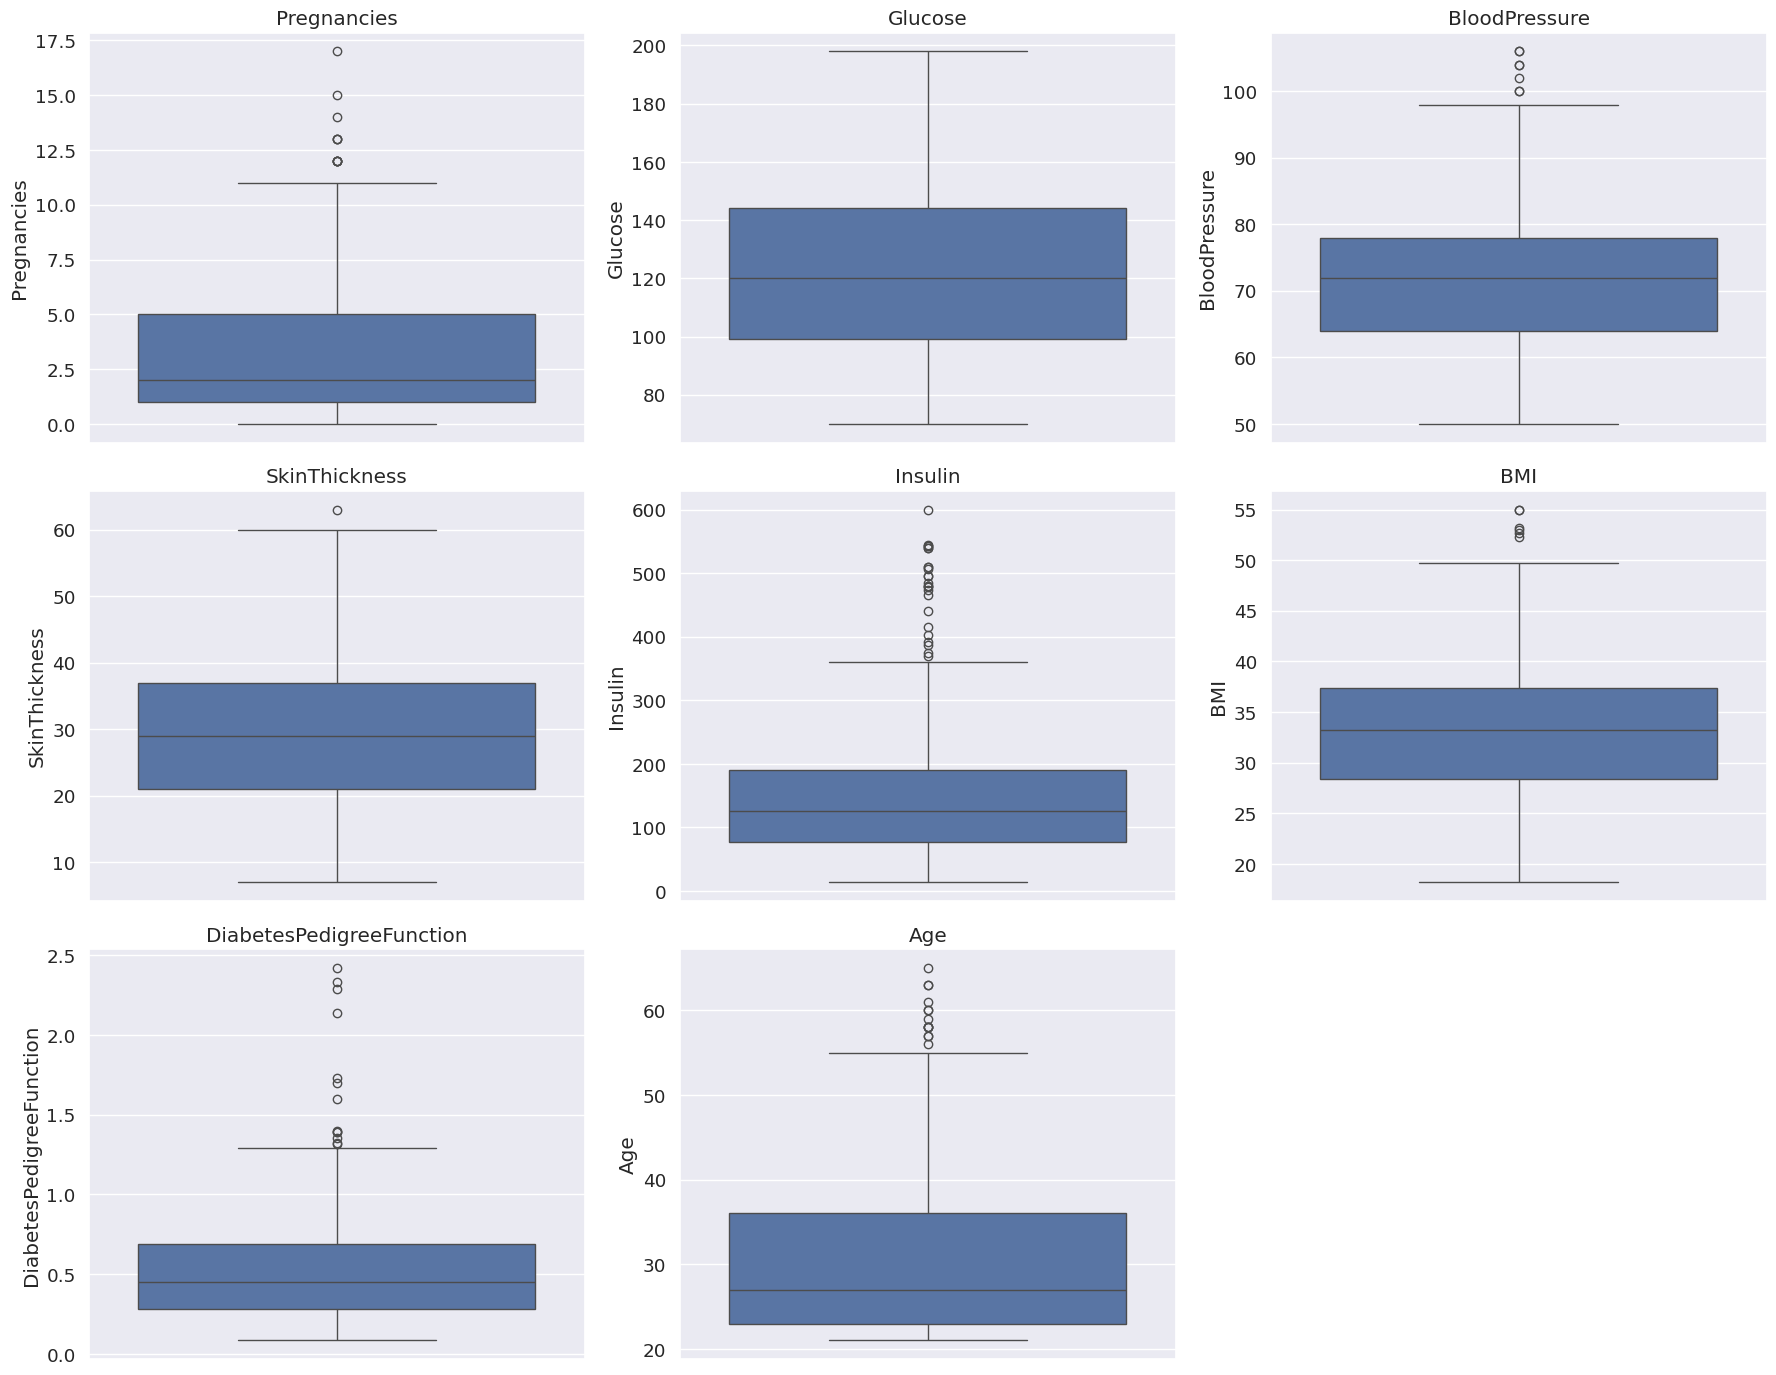

In [ ]:
# boxplot แสดงการกระจายตัวข้อมูลแต่ละfeature
plt.figure(figsize=(18, 14))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[col], orient='v')
    plt.title(col)

plt.tight_layout()
plt.show()

boxplot แสดงการกระจายตัวข้อมูลแต่ละfeature
* ตัวแปร Glucose, BloodPressure, SkinThickness และ BMI มีการกระจายตัวที่ค่อนข้างสมมาตร

* ตัวแปร Insulin, DiabetesPedigreeFunction, Age, และ Pregnancies มีการกระจายตัวแบบเบ้ขวา

* ในทุกตัวแปร มีบางค่าที่สูงโดด ซึ่งเป็นค่าที่สามารถเกิดขึ้นได้จริง จึงควรเก็บค่าOutliers เหล่านี้ไว้

* ตัวแปร Insulin ค่าที่สูง แสดงถึงภาวะดื้อต่ออินซูลิน

* ตัวแปร BloodPressure ค่าที่สูงถึง 100-110 มม.ปรอท สามารถบ่งชี้ถึงภาวะความดันโลหิตสูง


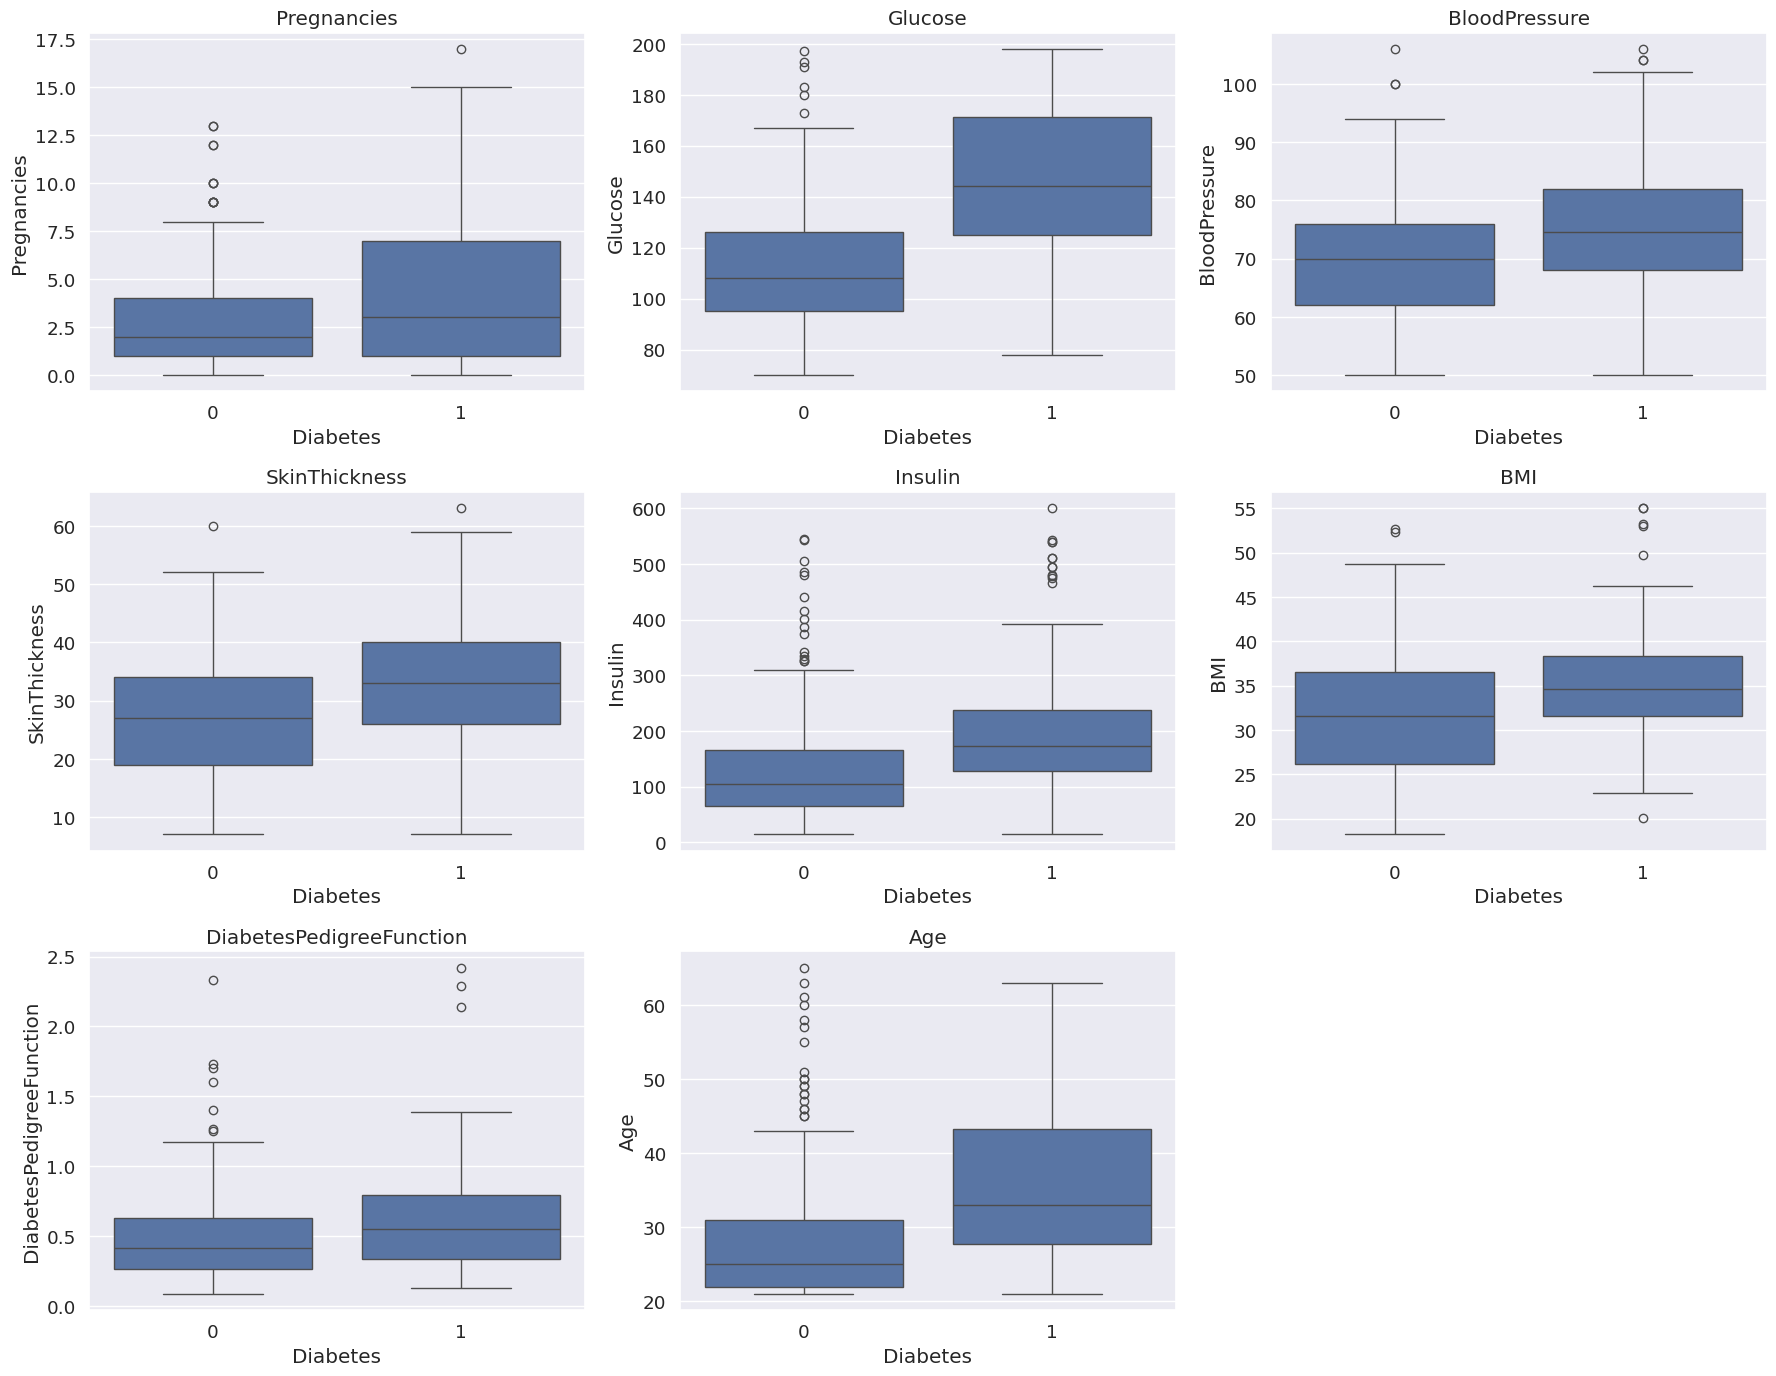

In [ ]:
# boxplot แสดงการกระจายตัวข้อมูลแต่ละfeature โดยแบ่งตามกลุ่มตัวอย่างDiabetes
plt.figure(figsize=(18, 14))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df["Diabetes"], y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

boxplot แสดงการกระจายตัวข้อมูลแต่ละfeature โดยแบ่งตามกลุ่มตัวอย่างDiabetes

* ตัวแปร Insulin มีการกระจายตัวกว้างมากในผู้ที่ไม่เป็นโรคเบาหวาน แสดงถึงภาวะการดื้อต่ออินซูลิน ในกลุ่มคนที่มีความเสี่ยงสูง แต่ยังไม่ถึงเกณฑ์วินิจฉัยว่าเป็นโรคเบาหวาน

* ตัวแปร Glucose ผู้ที่เป็นโรคเบาหวานมีค่ามัธยฐานสูงกว่าผู้ที่ไม่เป็นโรคเบาหวานอย่างชัดเจน ผู้ที่มีระดับน้ำตาลในเลือดสูง มีโอกาสที่จะเป็นโรคเบาหวาน

* ตัวแปร BMI, SkinThickness, DiabetesPedigreeFunction, BloodPressure, Age, และ Pregnancies  ผู้ที่เป็นโรคเบาหวานมีค่ามัธยฐานสูงกว่าผู้ที่ไม่เป็นโรคเบาหวานเล็กน้อย

  อาจสรุปได้ว่า ตัวแปรดังกล่าวเป็นเพียงปัจจัยสนับสนุน ผู้ที่อายุมาก มีความดันโลหิตสูง มีค่าBMIสูงหรืออ้วน มีจำนวนการตั้งครรภ์สูง หรือมีประวัติครอบครัวเป็นโรคเบาหวาน  นั้นมีแนวโน้มเพิ่มความเสี่ยงที่จะเป็นโรคเบาหวานในอนาคต

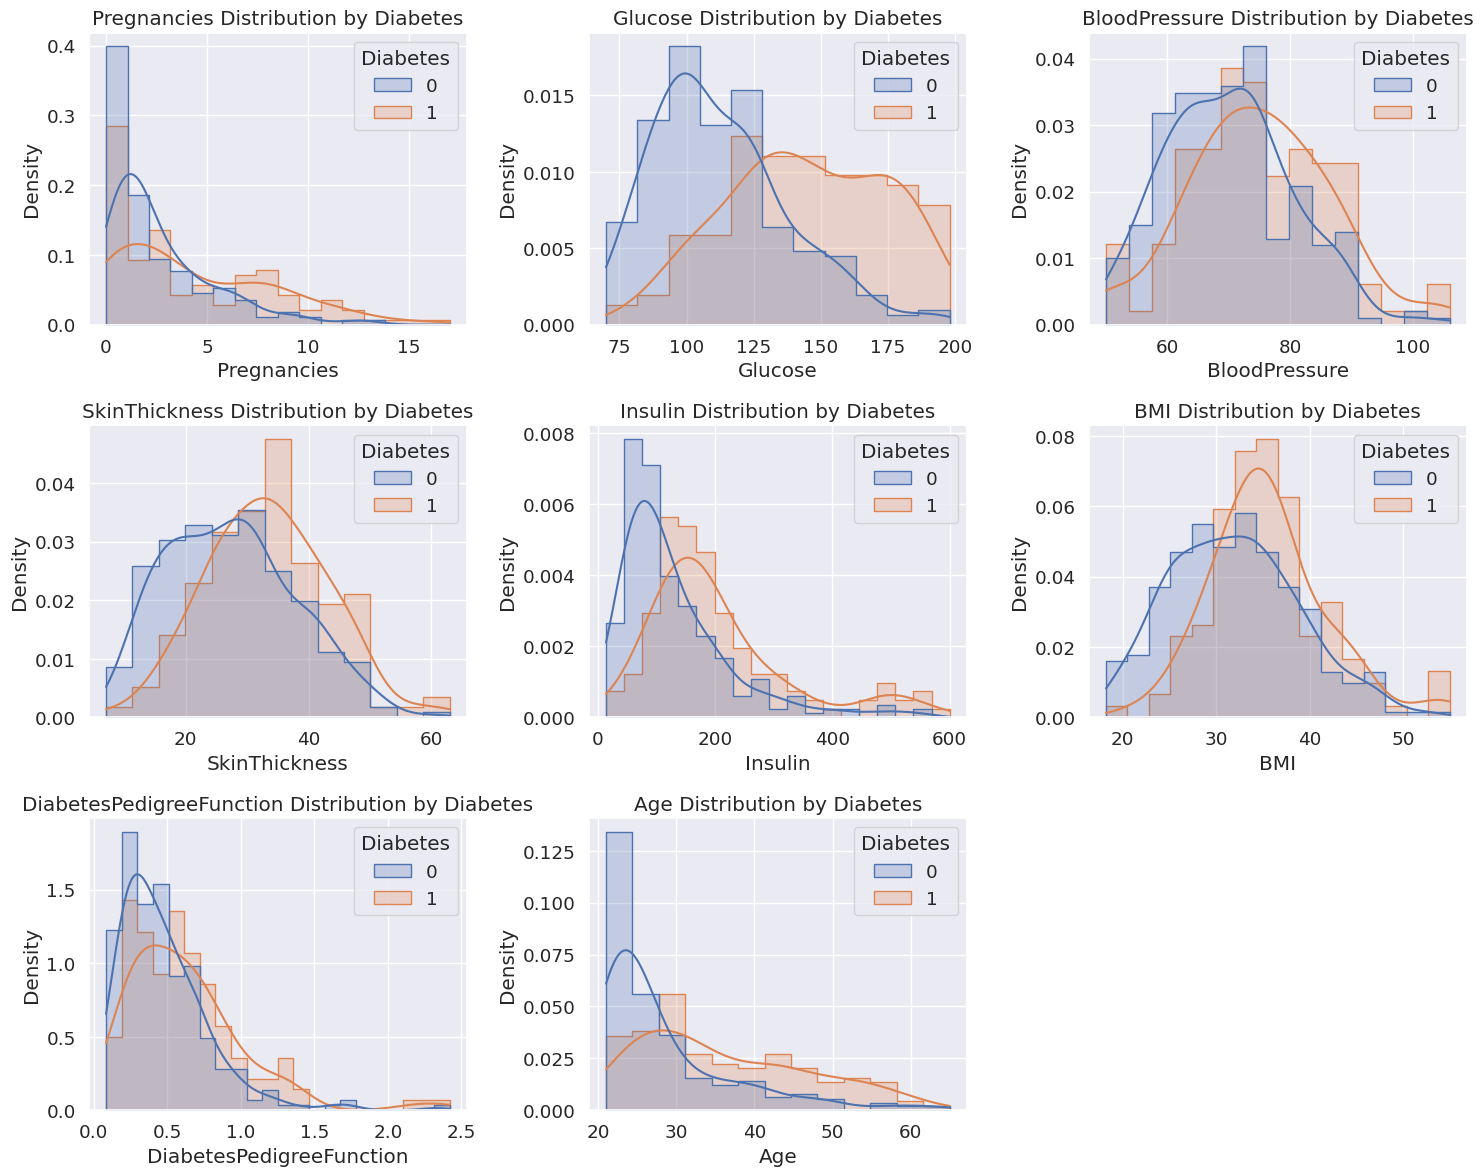

In [ ]:
# Histogram แสดงการกระจายตัวข้อมูลแต่ละfeature โดยแบ่งตามกลุ่มตัวอย่างDiabetes
# ใช้ ความหนาแน่นDensity ในเปรียบเทียบการกระจายตัวระหว่างสองกลุ่มที่มีจำนวนตัวอย่างไม่เท่ากัน
# ปรับค่าความสูงของแท่งHistogramให้มีพื้นที่ใต้กราฟรวมกันเท่ากับ 1 (หรือ 100%)

features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
rows = 3
cols = 3

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df, x=feature, hue='Diabetes', kde=True,
                 element='step', stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


Histogram แสดงการกระจายตัวข้อมูลแต่ละfeature โดยแบ่งตามกลุ่มตัวอย่างDiabetes

* ตัวแปร Glucose ผู้ที่เป็นเบาหวานมีระดับน้ำตาลในเลือดสูงกว่าผู้ที่ไม่เป็นเบาหวานอย่างมาก และการกระจายตัวของทั้งสองกลุ่มมีการซ้อนทับกันน้อยที่สุด ระดับน้ำตาลGlucose เป็นตัวบ่งชี้ความเสี่ยงการเป็นโรคเบาหวานได้ชัดเจน


* ตัวแปร BMI ผู้ที่เป็นโรคเบาหวานมีแนวโน้มที่จะมีค่า BMI สูงกว่าผู้ที่ไม่เป็นโรคเบาหวาน
แสดงว่าค่า BMI ที่สูง(ภาวะอ้วน) มีความสัมพันธ์กับการเป็นโรคเบาหวาน


* ตัวแปร Age ผู้ที่เป็นโรคเบาหวานโดยเฉลี่ยมีอายุมากกว่า และมีการกระจายตัวของอายุที่กว้างกว่า บ่งชี้ว่า อายุที่มากขึ้นเพิ่มความเสี่ยงการเป็นโรคเบาหวาน


* ตัวแปร BloodPressure และ SkinThickness รูปกราฟมีการซ้อนทับกันเกือบสมบูรณ์ แสดงว่าความดันโลหิตและความหนาของผิวหนังในผู้ที่เป็นโรคเบาหวานและไม่เป็นโรคเบาหวาน มีค่าเฉลี่ยและรูปแบบการกระจายตัวที่ใกล้เคียงกัน แสดงว่ามีความสัมพันธ์กับการเป็นโรคเบาหวานน้อย

* ตัวแปร DiabetesPedigreeFunction ผู้ที่เป็นโรคเบาหวานมีค่าสูงกว่าเล็กน้อย
แสดงว่าความเสี่ยงทางพันธุกรรมที่สูงขึ้นสัมพันธ์กับการเป็นโรคเบาหวาน


* ตัวแปร Insulin
ผู้ที่เป็นโรคเบาหวานมีค่าสูงกว่าในบางช่วง   โดยค่าสูงขึ้นบ่งชี้ถึงภาวะดื้อต่ออินซูลินที่รุนแรงขึ้นเรื่อยๆ
ขณะที่ผู้ที่ไม่เป็นโรคเบาหวาน
แต่ยังไม่ได้รับการวินิจฉัยว่าเป็นโรคเบาหวาน อาจมีค่าอินซูลินที่สูงได้

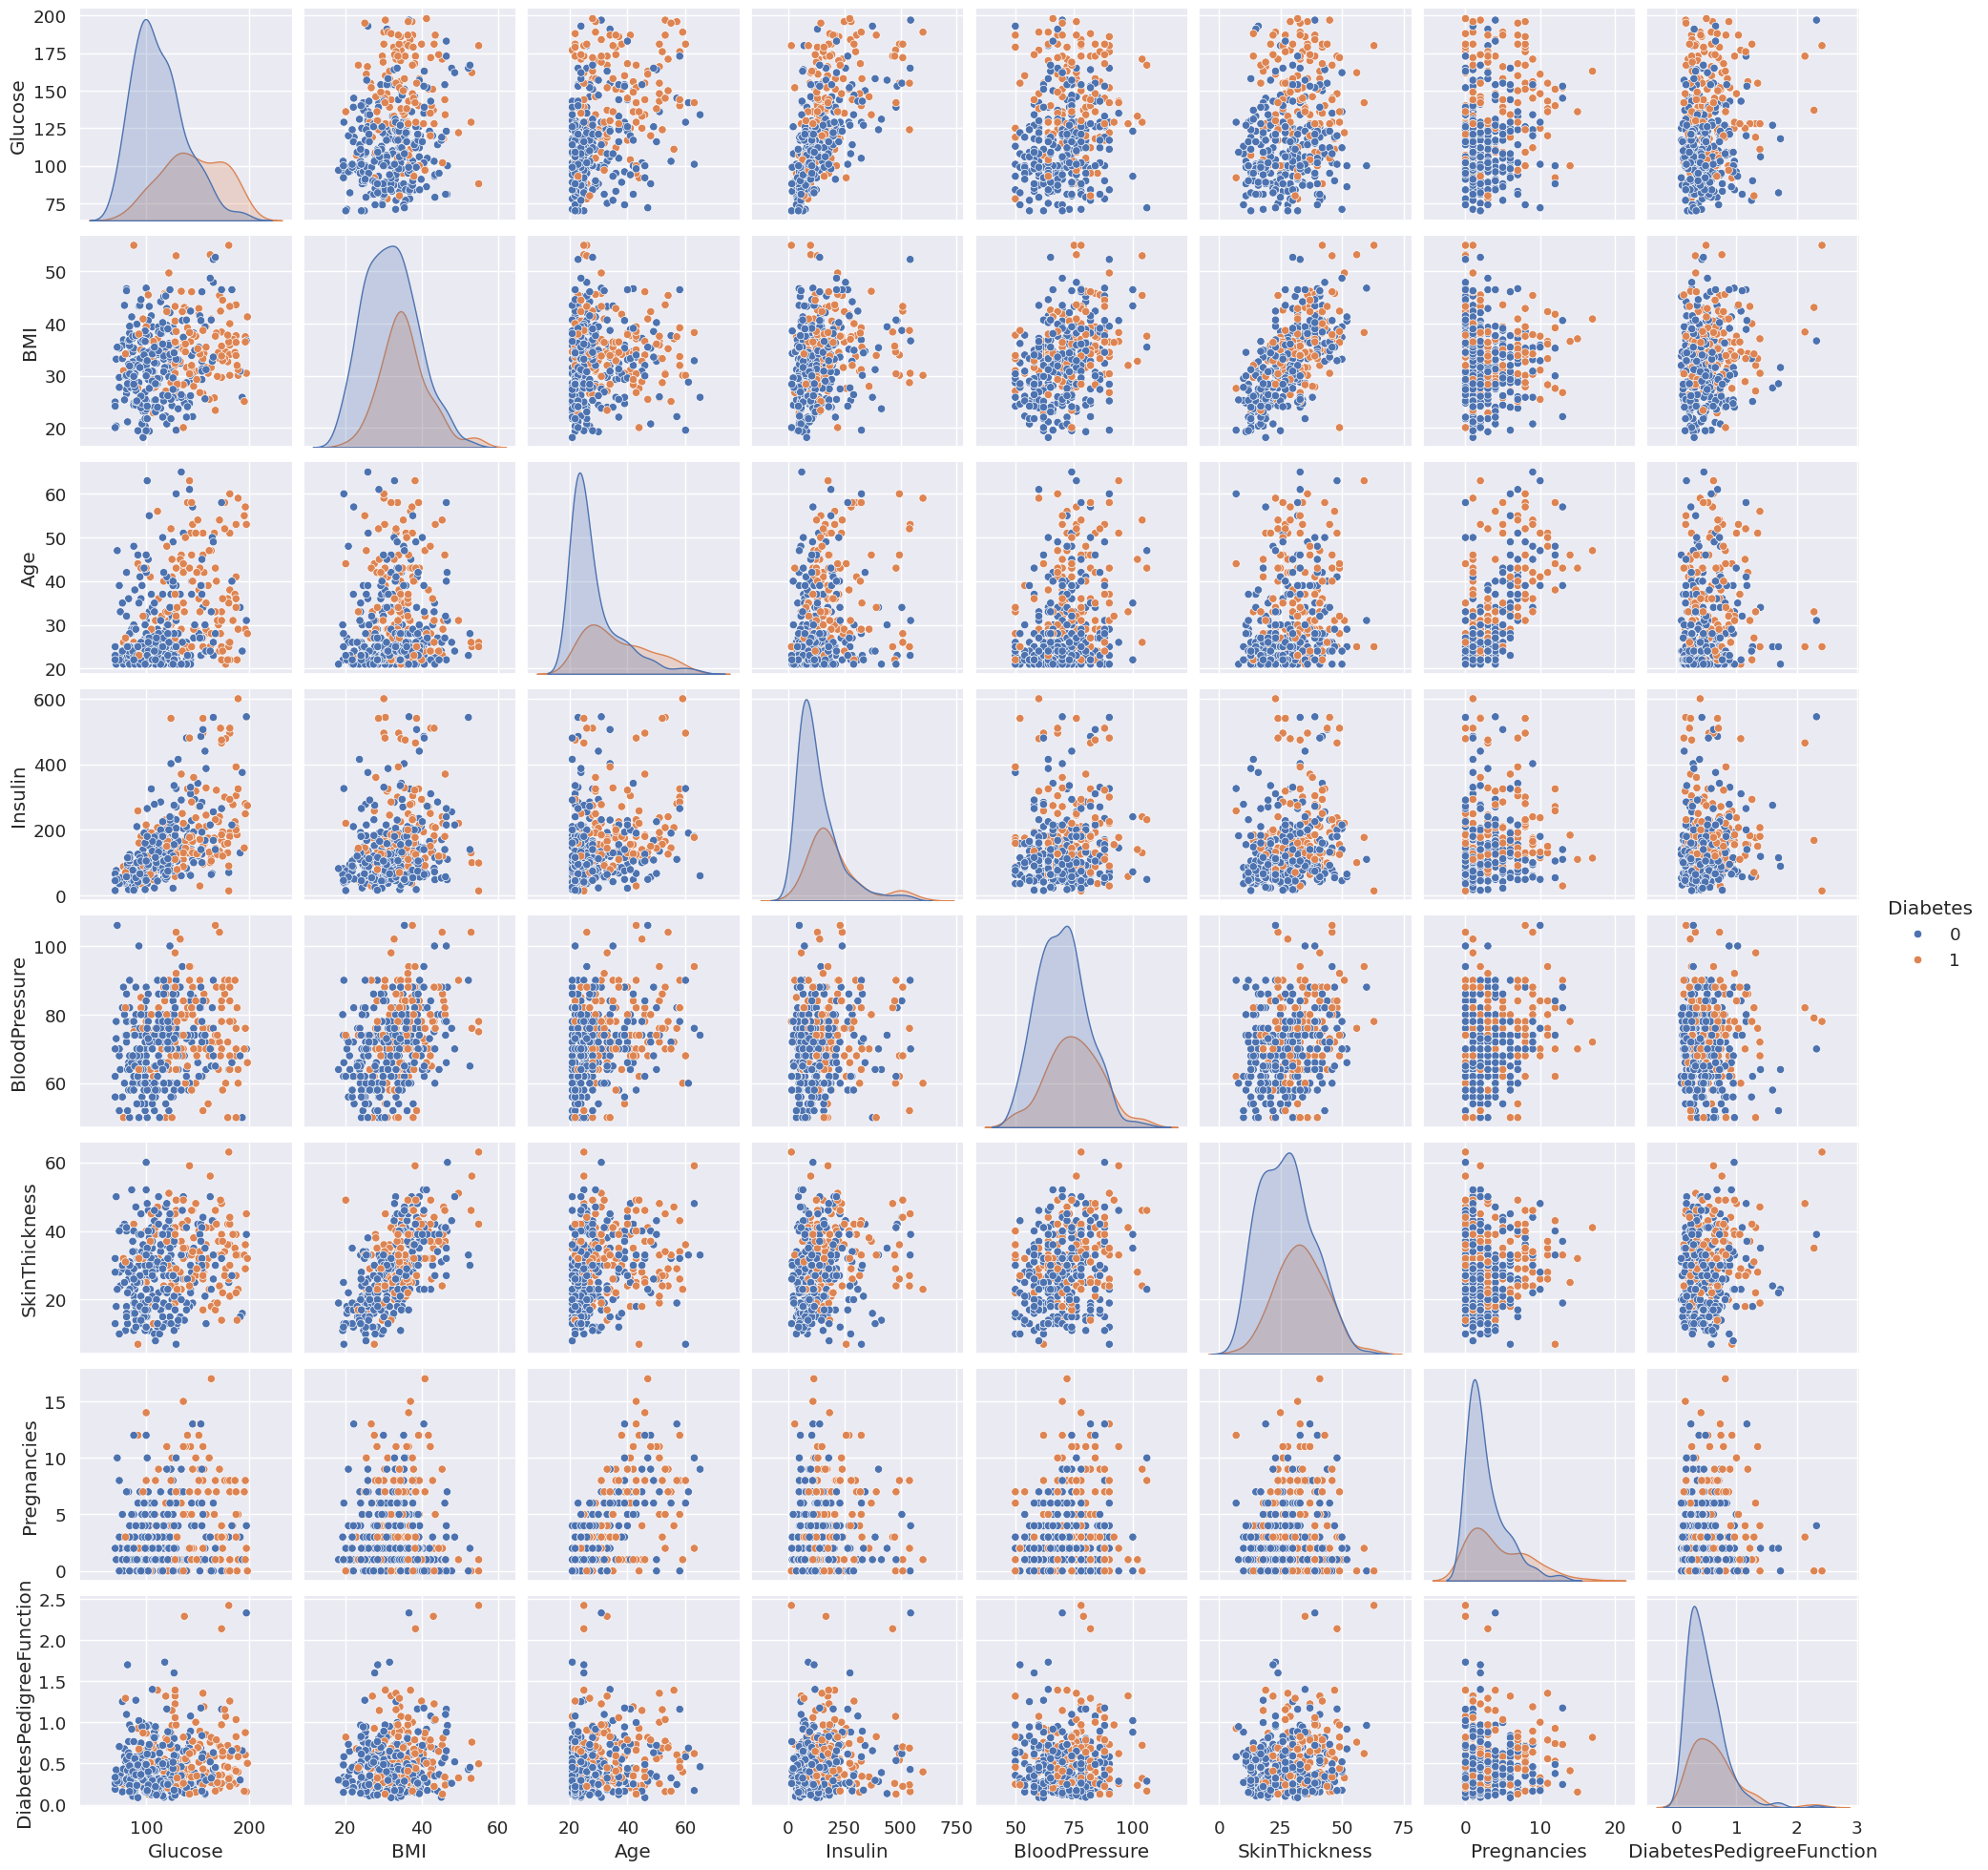

In [ ]:
# สร้าง pairplot เพื่อดูความสัมพันธ์ระหว่างfeature
cols = ["Glucose", "BMI", "Age", "Insulin", "Diabetes", "BloodPressure", "SkinThickness","Pregnancies","DiabetesPedigreeFunction"]
sns.pairplot(df[cols], hue="Diabetes")
plt.show()

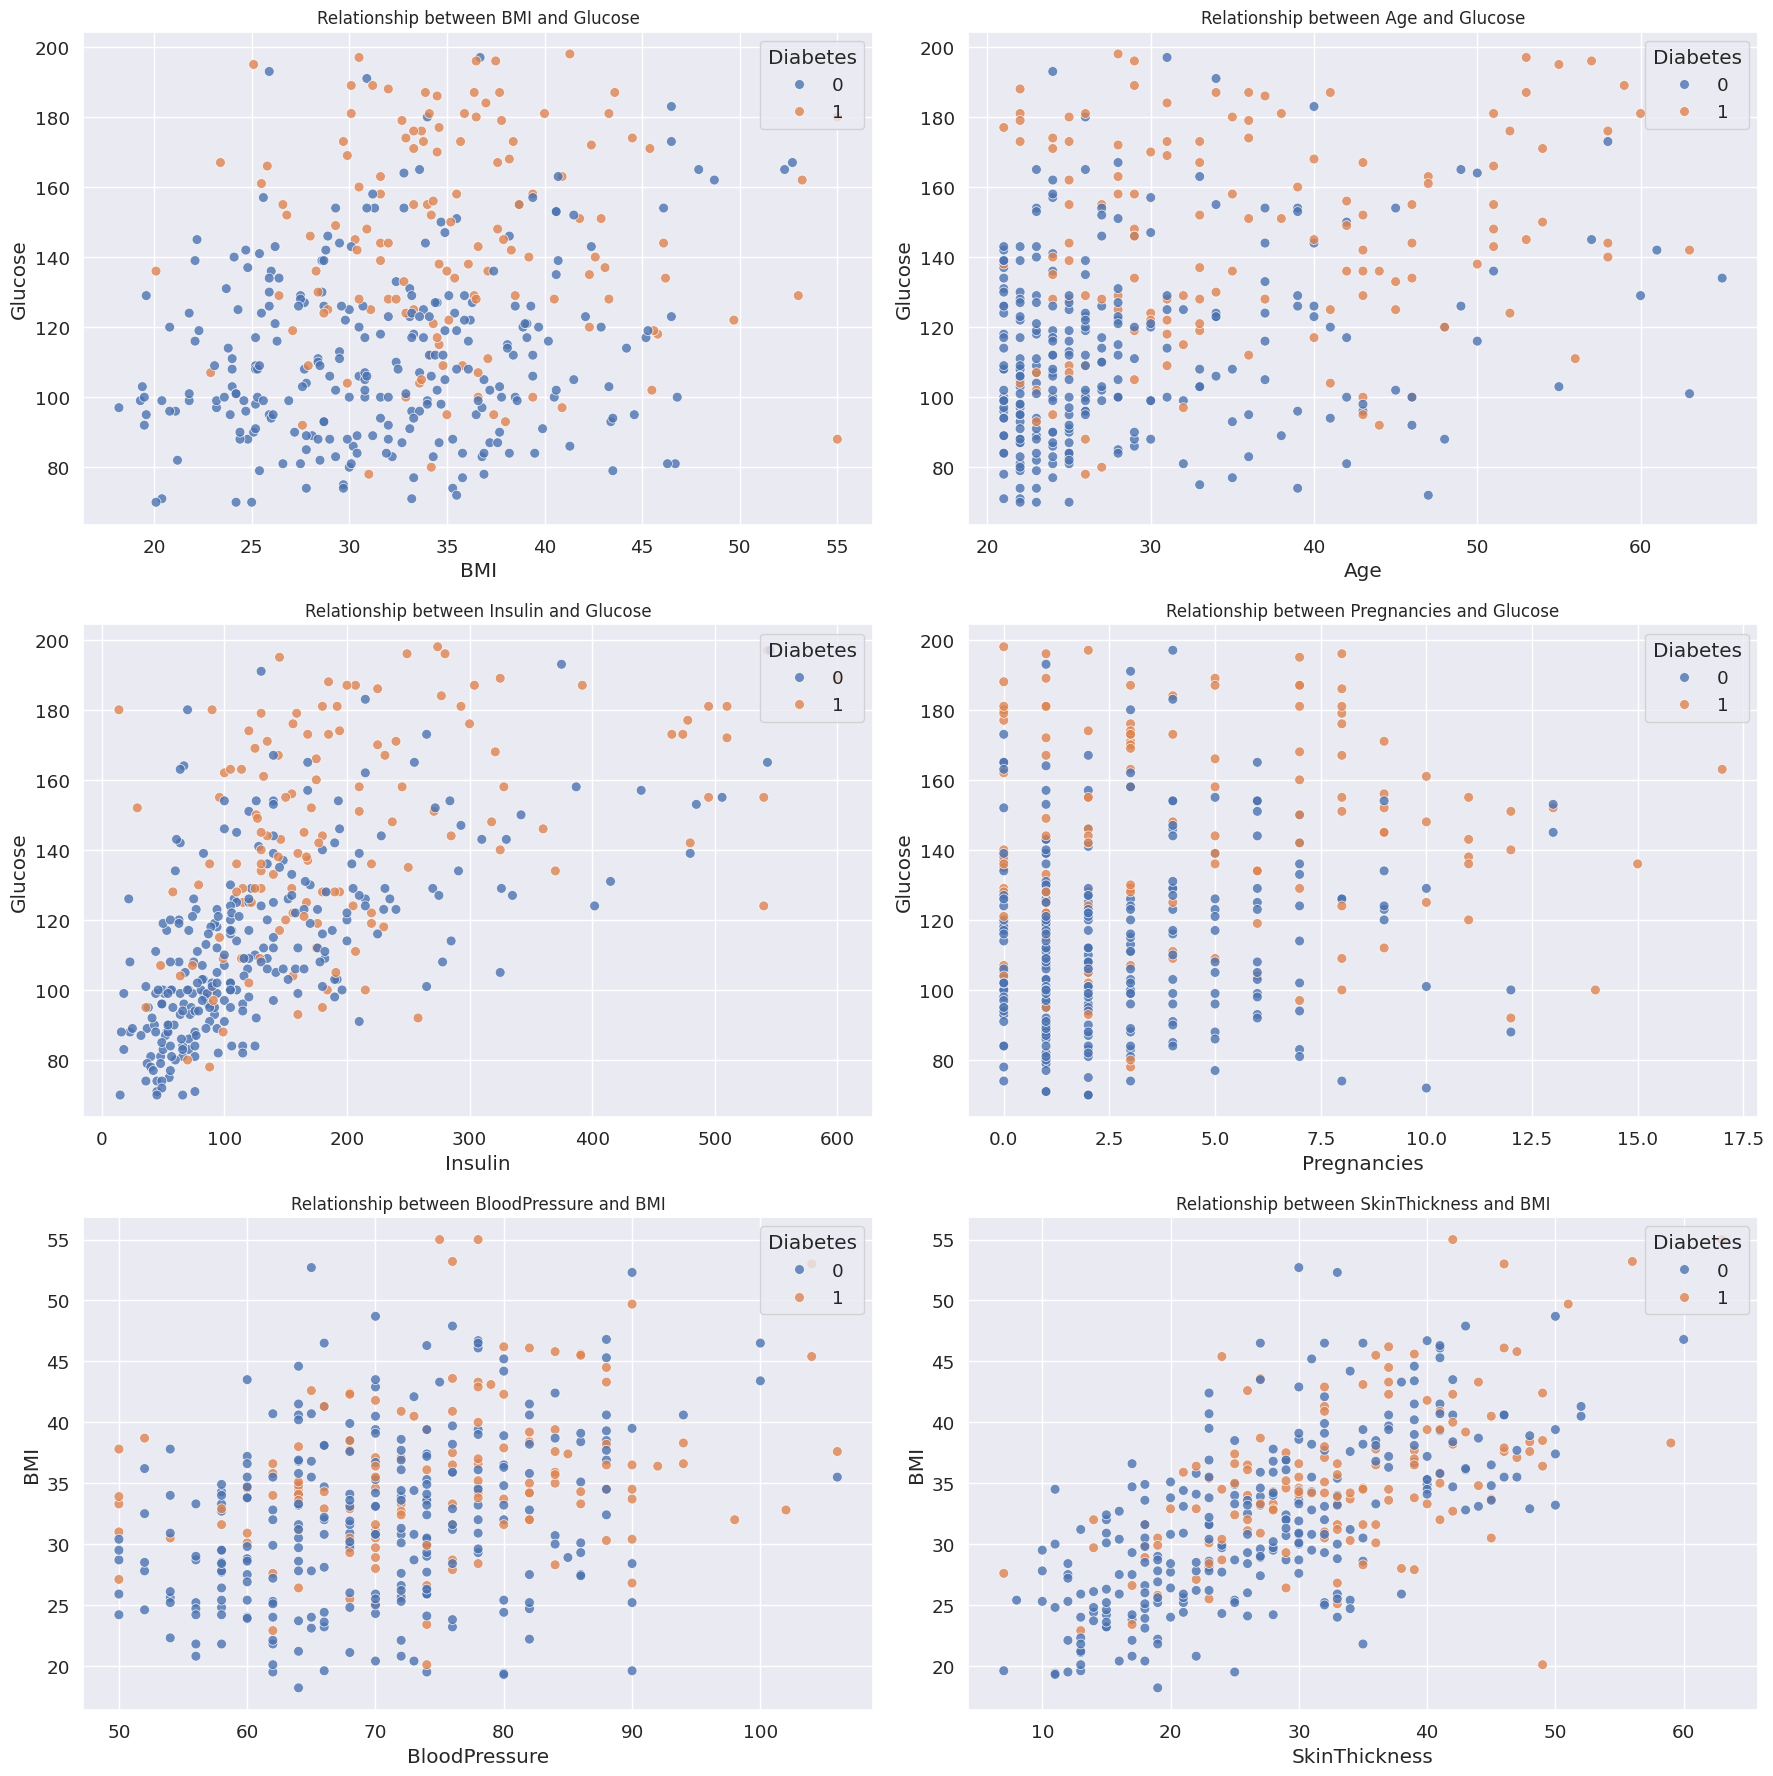

In [ ]:
# Scatter Plot ดูคู่ความสัมพันธ์ที่สนใจ
correlation_pairs = [
    ('BMI','Glucose' ),
    ('Age','Glucose'),
    ('Insulin', 'Glucose'),
    ('Pregnancies', 'Glucose'),
    ('BloodPressure', 'BMI'),
    ('SkinThickness', 'BMI')]

# กำหนดขนาดของ Figure
plt.figure(figsize=(18, 18))
rows = 3
cols = 2

for i, (x_feature, y_feature) in enumerate(correlation_pairs):
    plt.subplot(rows, cols, i + 1)

    # สร้าง Scatter Plot
    sns.scatterplot(data=df,x=x_feature,y=y_feature,hue='Diabetes', s=50,alpha=0.8 )

    plt.title(f'Relationship between {x_feature} and {y_feature}', fontsize=12)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Diabetes', loc='upper right')

plt.tight_layout()
plt.show()

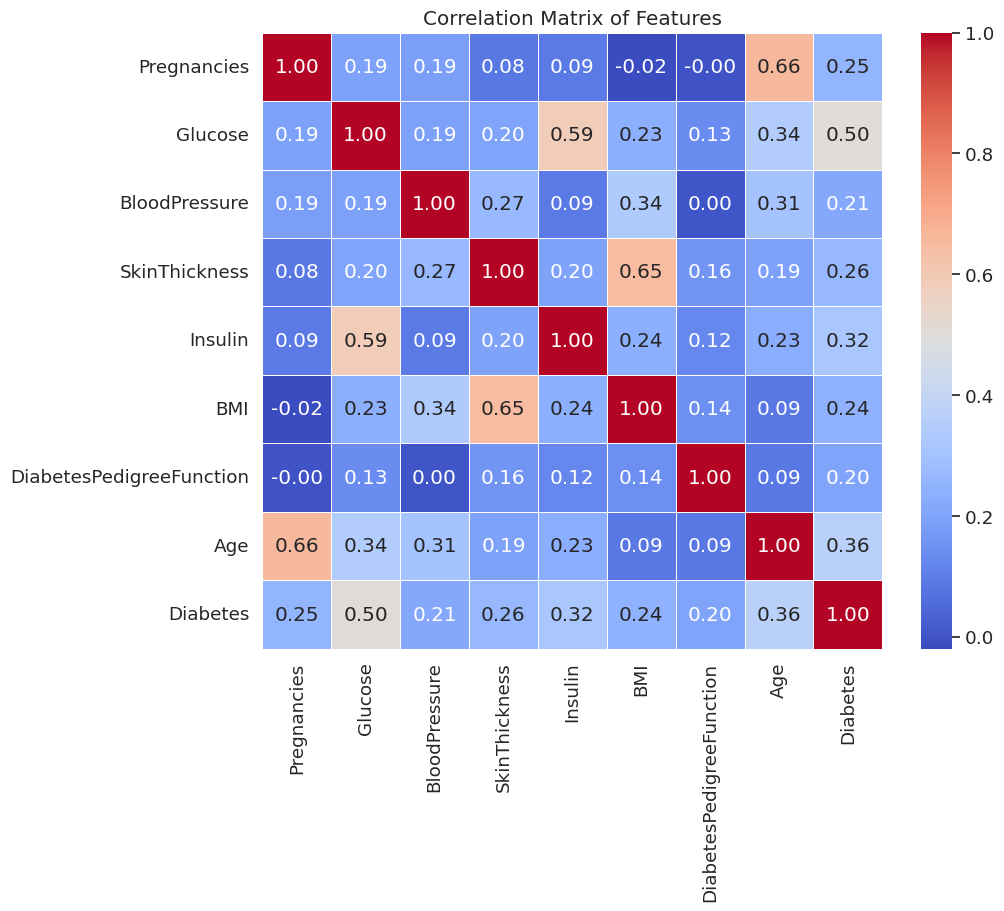

In [ ]:
# Correlation Matrix + Heatmap
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

#FINDINGS and INSIGHTS

**FINDINGS**

1. ผู้ที่เป็นโรคเบาหวานมีค่ามัธยฐานของ Glucose สูงกว่าผู้ที่ไม่เป็นโรคเบาหวานอย่างมีนัยสำคัญ และการกระจายตัวของกราฟมีการซ้อนทับกันน้อยที่สุด มีค่าcorrelation=0.50 มากกว่าตัวแปรอื่น


2. ผู้ที่เป็นโรคเบาหวานมีค่ามัธยฐานของ Age และ BMI สูงกว่าผู้ที่ไม่เป็นโรคเบาหวานอย่างชัดเจน

3. พบระดับInsulinที่สูงได้ ทั้งในผู้ที่เป็นโรคเบาหวานและผู้ที่มีความเสี่ยงเป็นโรคเบาหวาน แต่ยังไม่ได้รับการวินิจฉัยว่าเป็นโรคเบาหวาน อย่างไรก็ตาม ผู้ที่เป็นโรคเบาหวานมีค่ามัธยฐานของ Insulin สูงกว่าผู้ที่ไม่เป็นโรคเบาหวาน


4. ระดับน้ำตาลในเลือด(Glucose)และระดับอินซูลิน(Insulin) มีความสัมพันธ์ในทิศทางเดียวกัน มีค่าcorrelation=0.59

5. ผู้ที่เป็นและไม่เป็นโรคเบาหวาน มีค่ามัธยฐานของ BloodPressure, SkinThickness และ DiabetesPedigreeFunction ค่อนข้างใกล้เคียงกัน และการกระจายตัวของกราฟมีการซ้อนทับกันสูง ไม่เห็นความแตกต่างที่ชัดเจน มีความสัมพันธ์กับการเป็นโรคเบาหวานน้อย

6. การตั้งครรภ์(Pregnancies) มีความสัมพันธ์กับ Diabetes ในระดับอ่อน มีค่าcorrelation=0.25  และมีความสัมพันธ์กับ Age ในระดับสูง มีค่าcorrelation=0.66
และจากกราฟแสดงทิศทางแนวโน้มค่าที่สูงขึ้นในกลุ่มผู้ที่เป็นโรคเบาหวาน

**INSIGHTS**

1. ระดับน้ำตาลในเลือด(Glucose) เป็นตัวชี้วัดที่เชื่อถือได้ที่สุดในการจำแนกการเป็นโรคเบาหวาน

2. อายุที่มากขึ้น(Age) และ ภาวะน้ำหนักเกิน/อ้วน (BMI) เป็นปัจจัยที่เพิ่มความเสี่ยงการเป็นโรคเบาหวาน

3. ควรใช้ข้อมูลระดับน้ำตาลในเลือด(Glucose)และระดับอินซูลิน(Insulin)
พิจารณาร่วมกันในการประเมินผู้ที่มีโอกาสเป็นโรคเบาหวาน

4. ข้อมูลความดันโลหิต(BloodPressure) ความหนาของชั้นไขมัน(SkinThickness) ความเสี่ยงทางพันธุกรรม(DiabetesPedigreeFunction) และ การตั้งครรภ์(Pregnancies) ไม่สามารถใช้ในการจำแนกการเป็นโรคเบาหวาน แบบเดี่ยวๆได้ ดังนั้น ควรใช้พิจารณาร่วมกับปัจจัยอื่นๆ

5. สรุปปัจจัยที่มีผลต่อการเกิดโรคเบาหวาน

- ปัจจัยหลัก ได้แก่ Glucose, Insulin, BMI, Age

- ปัจจัยร่วม ได้แก่ Pregnancies,DiabetesPedigreeFunction,BloodPressure,SkinThickness

  โดยรวมแล้วค่าตัวแปรที่สูง มีแนวโน้มเพิ่มความเสี่ยงในการเป็นโรคเบาหวานมากขึ้น

# Build Machine Learning Model

## Logistic Regression Model

ขั้นตอนการสร้างโมเดล
1. ระบุตัวแปรต้น (Features) และตัวแปรตาม (Target)

2. แปลงข้อมูล โดยการทำ Log Transformation กับข้อมูลบางคอลัมน์ที่มีความเบ้สูง ให้มีการกระจายตัวสมมาตรขึ้น

3. แบ่งข้อมูลเป็นชุด Train/Test โดยควบคุมสัดส่วน (Stratify) ของข้อมูลDiabetesไว้ตามเดิม

4. Scaling ปรับสเกลข้อมูลให้อยู่ในมาตรฐานเดียวกันด้วย StandardScaler

5. Cross-Validation (CV) เช็คคะแนน 5 รอบ ตรวจสอบความเสถียร

6. Modeling (สร้างโมเดล): เทรนโมเดล Logistic Regression แบบปรับน้ำหนัก (Balanced)

7. Evaluation (วัดผล): ดูค่า Accuracy, Classification Report และ Confusion Matrix



CV Accuracy (5-fold): ['0.7833', '0.7167', '0.7667', '0.6667', '0.7667']
Mean CV Accuracy: 0.7400
Test Accuracy: 0.7624

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        68
           1       0.60      0.82      0.69        33

    accuracy                           0.76       101
   macro avg       0.75      0.78      0.75       101
weighted avg       0.80      0.76      0.77       101



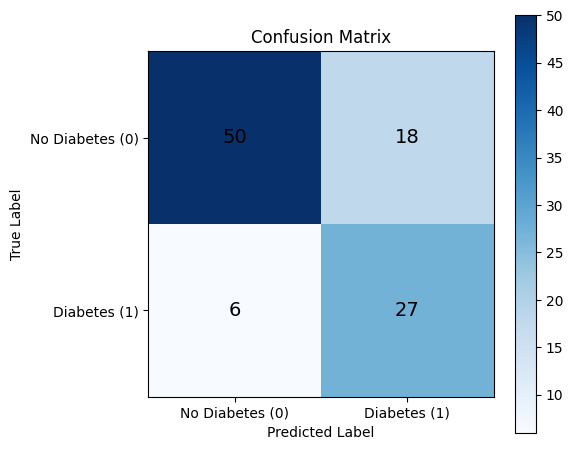

In [ ]:
# ระบุตัวแปร
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target = "Diabetes" # หรือ "Outcome" แล้วแต่ชื่อคอลัมน์ใน df

X = df[features].copy()
y = df[target]

# Log Transformation
# แปลงข้อมูลที่มีความเบ้สูงด้วย Log ให้สมมาตรขึ้น(ใช้ log1p เพื่อป้องกัน error กรณีค่าเป็น 0)
skewed_cols = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies", "BMI"]
for col in skewed_cols:
    X[col] = np.log1p(X[col])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression Model
# ใช้ class_weight='balanced' เพื่อแก้ปัญหาข้อมูลไม่สมดุล
log_reg = LogisticRegression(class_weight="balanced", random_state=42)

# Cross-Validation (CV = 5)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("CV Accuracy (5-fold):", [f"{score:.4f}" for score in cv_scores])
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Train model
log_reg.fit(X_train_scaled, y_train)

# Evaluation on Test Set
y_pred = log_reg.predict(X_test_scaled)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.set_theme()
plt.rcdefaults()
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

classes = ['No Diabetes (0)', 'Diabetes (1)']
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=14)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


=== 📊 Feature Coefficients (ปัจจัยที่ส่งผลต่อโรคเบาหวาน) ===
                    Feature  Coefficient  Odds_Ratio
1                   Glucose         0.94        2.56
6  DiabetesPedigreeFunction         0.45        1.57
7                       Age         0.43        1.54
5                       BMI         0.35        1.42
0               Pregnancies         0.26        1.29
3             SkinThickness         0.23        1.26
4                   Insulin         0.15        1.16
2             BloodPressure         0.11        1.12


/tmp/ipython-input-1923139074.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df, palette=colors)


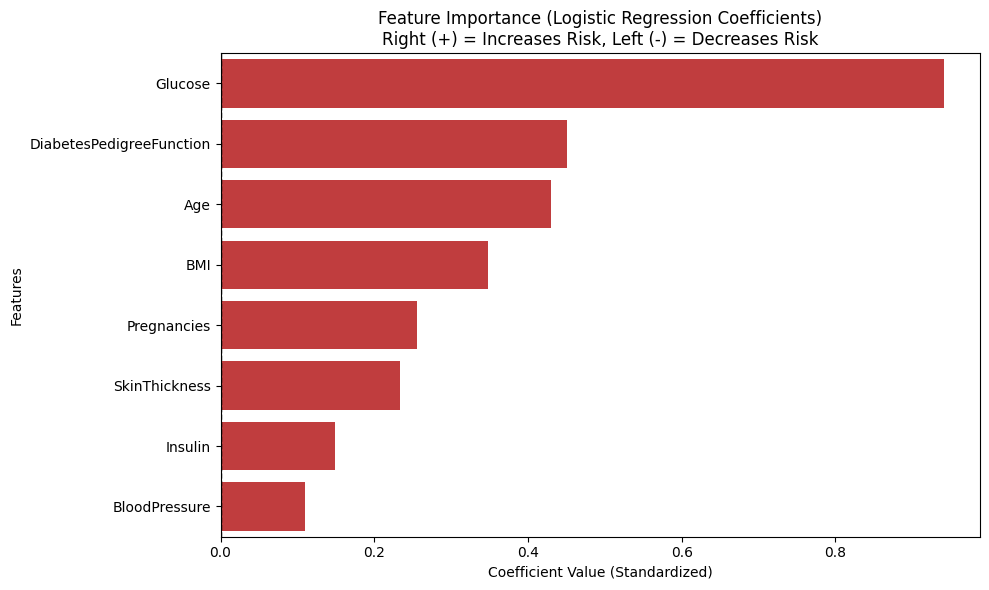

In [ ]:
# --- ส่วนที่เพิ่ม: หาค่าสัมประสิทธิ์ (Feature Importance) ---

# 1. ดึงค่าสัมประสิทธิ์จากโมเดล
coefficients = log_reg.coef_[0]
feature_names = features

# 2. สร้าง DataFrame เพื่อเก็บและจัดเรียงข้อมูล
feature_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients) # แปลงเป็น Odds Ratio (โอกาสเสี่ยงเพิ่มขึ้นกี่เท่า)
})

# 3. เพิ่มคอลัมน์ค่าสัมบูรณ์ (Absolute) เพื่อใช้เรียงลำดับความแรง (ไม่สนบวก/ลบ)
feature_coef_df['Abs_Coefficient'] = feature_coef_df['Coefficient'].abs()

# 4. เรียงลำดับจากปัจจัยที่ส่งผลแรงที่สุด -> น้อยที่สุด
feature_coef_df = feature_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# 5. แสดงผลเป็นตาราง
print("\n=== 📊 Feature Coefficients (ปัจจัยที่ส่งผลต่อโรคเบาหวาน) ===")
print(feature_coef_df[['Feature', 'Coefficient', 'Odds_Ratio']])

# --- Visualization (กราฟแท่ง) ---
plt.figure(figsize=(10, 6))

# กำหนดสี: สีแดง = เพิ่มความเสี่ยง (ค่าบวก), สีเขียว = ลดความเสี่ยง (ค่าลบ)
colors = ['#d62728' if x > 0 else '#2ca02c' for x in feature_coef_df['Coefficient']]

sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df, palette=colors)

plt.title('Feature Importance (Logistic Regression Coefficients)\nRight (+) = Increases Risk, Left (-) = Decreases Risk')
plt.xlabel('Coefficient Value (Standardized)')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # เส้นแบ่งที่ 0
plt.tight_layout()
plt.show()

## K-Nearest Neighbors Model

Best Parameters  : {'n_neighbors': 19, 'weights': 'uniform'}
Best n_neighbors : 19
Best CV Accuracy : 0.7667

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        68
           1       0.70      0.58      0.63        33

    accuracy                           0.78       101
   macro avg       0.76      0.73      0.74       101
weighted avg       0.78      0.78      0.78       101



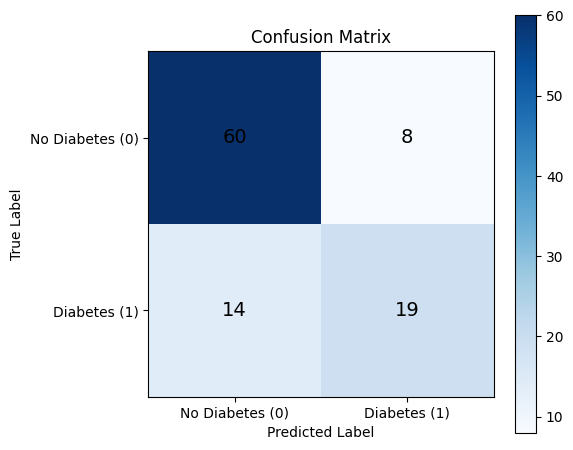

CV Accuracy (5-fold): ['0.8500', '0.6833', '0.7667', '0.7333', '0.8000']
Mean CV Accuracy: 0.7667


In [ ]:
# ระบุตัวแปร
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target = "Diabetes" # เปลี่ยนตามชื่อจริงใน df (Outcome/Diabetes)

X = df[features].copy()
y = df[target]

# Log Transformation
# แปลงข้อมูลที่มีความเบ้สูงด้วย Log ให้สมมาตรขึ้น(ใช้ log1p เพื่อป้องกัน error กรณีค่าเป็น 0)
skewed_cols = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies", "BMI"]
for col in skewed_cols:
    X[col] = np.log1p(X[col])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Scaling (fit only on train)
scaler = StandardScaler()

# ใช้ X_train โดยตรง (เพราะไม่ได้ทำ Poly)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# GridSearchCV for Best K
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
              'weights': ['uniform', 'distance'] }

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the gridsearch
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best Parameters  : {grid_search.best_params_}")
print(f"Best n_neighbors : {best_n_neighbors}")
print(f"Best CV Accuracy : {best_score:.4f}")


# Evaluate on Test Set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
y_proba = best_knn.predict_proba(X_test_scaled)[:, 1]


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

classes = ['No Diabetes (0)', 'Diabetes (1)']
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=14)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

cv_scores_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("CV Accuracy (5-fold):", [f"{score:.4f}" for score in cv_scores_knn])
print(f"Mean CV Accuracy: {cv_scores_knn.mean():.4f}")

In [ ]:
# สร้าง Risk Profile สำหรับคัดกรองเบื้องต้น (Screening Profile)

# 1) รวมข้อมูลจริง + ทำนาย + probability
df_test_result = X_test.copy()
df_test_result["Actual"] = y_test.values
df_test_result["Predict"] = y_pred
df_test_result["Probability"] = y_proba

# 2) เลือกเฉพาะผู้ป่วยจริงที่โมเดลทำนายถูกต้อง (True Positive)
df_TP = df_test_result[(df_test_result["Actual"] == 1) &
                       (df_test_result["Predict"] == 1)]

print("จำนวนผู้ป่วยจริงที่ทำนายถูกต้อง (TP):", len(df_TP))

# 3) คำนวณค่า Median ของแต่ละตัวแปร X
feature_cols = [col for col in df_TP.columns if col not in ["Actual", "Predict", "Probability"]]

medians = df_TP[feature_cols].median()

print("\n===== Median ของผู้ป่วยจริง (ใช้เป็นเกณฑ์แบ่งกลุ่มเสี่ยง) =====")
print(medians)

# 4) แบ่งกลุ่มความเสี่ยง Low / High
risk_results = {}

for col in feature_cols:
    risk_results[col] = {
        "low_risk_max": medians[col],
        "high_risk_min": medians[col] }

# 5) สร้าง DataFrame แสดงผลแบบอ่านง่าย
risk_table = pd.DataFrame({
    "Low Risk (<= median)": medians,
    "High Risk (> median)": medians })

print("\n===== Risk Thresholds (Low vs High) =====")
print(risk_table)

# 6) แสดงค่ากลางและสถิติของผู้ป่วยจริง (ช่วยตีความ)
summary_stats = df_TP[feature_cols].describe().T[["min", "25%", "50%", "75%", "max"]]

print("\n===== Summary Stats ของผู้ป่วยจริง (TP) =====")
print(summary_stats)


จำนวนผู้ป่วยจริงที่ทำนายถูกต้อง (TP): 19

===== Median ของผู้ป่วยจริง (ใช้เป็นเกณฑ์แบ่งกลุ่มเสี่ยง) =====
Pregnancies                  2.08
Glucose                    160.00
BloodPressure               78.00
SkinThickness               34.00
Insulin                      5.26
BMI                          3.62
DiabetesPedigreeFunction     0.47
Age                          3.74
dtype: float64

===== Risk Thresholds (Low vs High) =====
                          Low Risk (<= median)  High Risk (> median)
Pregnancies                               2.08                  2.08
Glucose                                 160.00                160.00
BloodPressure                            78.00                 78.00
SkinThickness                            34.00                 34.00
Insulin                                   5.26                  5.26
BMI                                       3.62                  3.62
DiabetesPedigreeFunction                  0.47                  0.47
Age         

In [ ]:
print("\n" + "="*50)
print("🏥 Risk Profile Analysis (สำหรับคัดกรองเบื้องต้น)")
print("="*50)

# 1. รวมข้อมูลผลลัพธ์
df_test_result = X_test.copy()
df_test_result["Actual"] = y_test.values
df_test_result["Predict"] = y_pred
df_test_result["Probability"] = y_proba

# 2. เลือกเฉพาะคนที่ 'ป่วยจริง' และโมเดล 'ทายถูก' (True Positive)
# เพราะนี่คือกลุ่มเป้าหมายที่เราอยากรู้ลักษณะเฉพาะ
df_TP = df_test_result[(df_test_result["Actual"] == 1) & (df_test_result["Predict"] == 1)].copy()

print(f"จำนวนผู้ป่วยกลุ่มตัวอย่าง (True Positive): {len(df_TP)} คน")

# 3. >>> จุดสำคัญ: แปลงค่า Log กลับเป็นค่าจริง (Inverse Log) <<<
# ใช้ np.expm1 (inverse ของ log1p) กับคอลัมน์ที่เคยแปลงไป
for col in skewed_cols:
    df_TP[col] = np.expm1(df_TP[col])

# 4. คำนวณค่ามัธยฐาน (Median) เพื่อใช้เป็นเกณฑ์ตัดเกรดความเสี่ยง
# เลือก Median เพราะไม่ไวต่อค่าผิดปกติ (Outlier) เท่า Mean
feature_final = [col for col in feature_cols if col in df_TP.columns]
risk_thresholds = df_TP[feature_final].median()

# 5. แสดงผลตารางเกณฑ์ความเสี่ยง (Screening Checklist)
risk_table = pd.DataFrame({
    "Variable": risk_thresholds.index,
    "High Risk Threshold (> Value)": risk_thresholds.values
})

# จัด Format ให้สวยงาม (ทศนิยม 2 ตำแหน่ง)
pd.options.display.float_format = '{:.2f}'.format
print("\n📋 เกณฑ์คัดกรองความเสี่ยงสูง (High Risk Screening Thresholds)")
print("หากผู้รับการตรวจมีค่า 'สูงกว่า' เกณฑ์นี้ ถือว่ามีความเสี่ยงสูง")
print("-" * 60)
print(risk_table)
print("-" * 60)

# 6. สรุปสถิติเพื่อดูช่วงข้อมูล (Range)
summary_stats = df_TP[feature_final].describe().T[["min", "25%", "50%", "75%", "max"]]
print("\n📊 สถิติข้อมูลของผู้ป่วยจริง (Reference Range)")
print(summary_stats)


🏥 Risk Profile Analysis (สำหรับคัดกรองเบื้องต้น)
จำนวนผู้ป่วยกลุ่มตัวอย่าง (True Positive): 19 คน

📋 เกณฑ์คัดกรองความเสี่ยงสูง (High Risk Screening Thresholds)
หากผู้รับการตรวจมีค่า 'สูงกว่า' เกณฑ์นี้ ถือว่ามีความเสี่ยงสูง
------------------------------------------------------------
                   Variable  High Risk Threshold (> Value)
0               Pregnancies                           7.00
1                   Glucose                         160.00
2             BloodPressure                          78.00
3             SkinThickness                          34.00
4                   Insulin                         192.00
5                       BMI                          36.50
6  DiabetesPedigreeFunction                           0.60
7                       Age                          41.00
------------------------------------------------------------

📊 สถิติข้อมูลของผู้ป่วยจริง (Reference Range)
                            min    25%    50%    75%    max
Pregnancies     

In [ ]:
print("\n" + "="*50)
print("🏥 Risk Profile Analysis (ใช้เกณฑ์ Q1/25% เพื่อความไวในการคัดกรอง)")
print("="*50)

# 1. รวมข้อมูลผลลัพธ์
df_test_result = X_test.copy()
df_test_result["Actual"] = y_test.values
df_test_result["Predict"] = y_pred
df_test_result["Probability"] = y_proba

# 2. เลือกเฉพาะคนที่ 'ป่วยจริง' และโมเดล 'ทายถูก' (True Positive)
df_TP = df_test_result[(df_test_result["Actual"] == 1) & (df_test_result["Predict"] == 1)].copy()

print(f"จำนวนผู้ป่วยกลุ่มตัวอย่าง (True Positive): {len(df_TP)} คน")

# 3. แปลงค่า Log กลับเป็นค่าจริง (Inverse Log)
for col in skewed_cols:
    df_TP[col] = np.expm1(df_TP[col])

# 4. >>> แก้ไขตรงนี้: ใช้ Quantile 0.25 (Q1) แทน Median <<<
# Q1 หมายถึงค่าที่ต่ำกว่า Median ซึ่งจะช่วย "ดักจับ" กลุ่มเสี่ยงได้กว้างขึ้น (Sensitive Screening)
feature_final = [col for col in feature_cols if col in df_TP.columns]
risk_thresholds = df_TP[feature_final].quantile(0.25)

# 5. แสดงผลตารางเกณฑ์ความเสี่ยง
risk_table = pd.DataFrame({
    "Variable": risk_thresholds.index,
    "Screening Threshold (> Q1 Value)": risk_thresholds.values
})

pd.options.display.float_format = '{:.2f}'.format
print("\n📋 เกณฑ์คัดกรองความเสี่ยง (Screening Thresholds - Q1)")
print("หากผู้รับการตรวจมีค่า 'สูงกว่า' เกณฑ์นี้ ควรเริ่มเฝ้าระวังหรือปรับพฤติกรรม")
print("-" * 65)
print(risk_table)
print("-" * 65)

# 6. สรุปสถิติเพื่อดูช่วงข้อมูล
summary_stats = df_TP[feature_final].describe().T[["min", "25%", "50%", "75%", "max"]]
print("\n📊 สถิติข้อมูลของผู้ป่วยจริง (Reference Range)")
print(summary_stats)


🏥 Risk Profile Analysis (ใช้เกณฑ์ Q1/25% เพื่อความไวในการคัดกรอง)
จำนวนผู้ป่วยกลุ่มตัวอย่าง (True Positive): 19 คน

📋 เกณฑ์คัดกรองความเสี่ยง (Screening Thresholds - Q1)
หากผู้รับการตรวจมีค่า 'สูงกว่า' เกณฑ์นี้ ควรเริ่มเฝ้าระวังหรือปรับพฤติกรรม
-----------------------------------------------------------------
                   Variable  Screening Threshold (> Q1 Value)
0               Pregnancies                              4.00
1                   Glucose                            145.00
2             BloodPressure                             68.00
3             SkinThickness                             29.00
4                   Insulin                            166.50
5                       BMI                             32.25
6  DiabetesPedigreeFunction                              0.43
7                       Age                             32.00
-----------------------------------------------------------------

📊 สถิติข้อมูลของผู้ป่วยจริง (Reference Range)
                  

# Summary